### Регуляризация в линейных моделях. Метод Ближайших Соседей (KNN)

## 1. Регуляризация в линейных моделях

Регуляризация - метод добавления некоторых дополнительных ограничений к условию с целью решить некорректно поставленную задачу или предотвратить переобучение. 

Источники:
1. https://neerc.ifmo.ru/wiki/index.php?title=%D0%A0%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F
2. https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/lecture-notes/lecture03-linregr.pdf    
3. http://www.machinelearning.ru/wiki/images/7/7e/VetrovSem11_LARS.pdf
4. https://towardsdatascience.com/regularization-in-machine-learning-connecting-the-dots-c6e030bfaddd

In [80]:
#linear algebra
import numpy as np
#data structures
import pandas as pd
#ml models
import scipy as sp
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
#plots
import matplotlib.pyplot as plt
%matplotlib inline
#beautiful plots
import seaborn as sns
#linear regression
import statsmodels.api as sm
#set style for plots
sns.set_style('darkgrid')
#off the warnings
import warnings
warnings.filterwarnings("ignore")

In [81]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split

### Логистическая регрессия:

Изучим метод на наборе данных для прогнозирования рака молочной железы:

In [82]:
# Загрузка данных
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [83]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)

print('Точность на обучающей выборке: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Точность на тестовой выборке: {:.3f}'.format(log_reg.score(X_test,y_test)))

Точность на обучающей выборке: 0.955
Точность на тестовой выборке: 0.951


In [84]:
log_reg.score(X_train,y_train)

0.9553990610328639

In [85]:
y_pred = log_reg.predict(X_train)

In [86]:
accuracy_score(y_pred, y_train)

0.9553990610328639

In [87]:
cancer.data.shape, X_train.shape

((569, 30), (426, 30))

#### Посмотрим на коэффициенты модели:

In [88]:
log_reg?

Type:        LogisticRegression
String form: LogisticRegression()
File:        c:\users\sadamonyan\appdata\local\programs\python\python312\lib\site-packages\sklearn\linear_model\_logistic.py
Docstring:  
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers suppor

In [89]:
cancer.data.shape[1]

30

In [90]:
log_reg.coef_[0]

array([ 1.72986804,  0.06993511, -0.03679375,  0.00352539, -0.07711022,
       -0.33614148, -0.46950632, -0.19582273, -0.1226749 , -0.02606855,
        0.06868972,  0.89909348,  0.37673359, -0.11447379, -0.00722374,
       -0.07282548, -0.10355687, -0.02579538, -0.0301343 , -0.00660186,
        1.6944499 , -0.29774185, -0.16545119, -0.02956756, -0.13780058,
       -1.08650619, -1.35759075, -0.38873386, -0.37734049, -0.10889192])

In [91]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [92]:
log_reg.coef_[0]

array([ 1.72986804,  0.06993511, -0.03679375,  0.00352539, -0.07711022,
       -0.33614148, -0.46950632, -0.19582273, -0.1226749 , -0.02606855,
        0.06868972,  0.89909348,  0.37673359, -0.11447379, -0.00722374,
       -0.07282548, -0.10355687, -0.02579538, -0.0301343 , -0.00660186,
        1.6944499 , -0.29774185, -0.16545119, -0.02956756, -0.13780058,
       -1.08650619, -1.35759075, -0.38873386, -0.37734049, -0.10889192])

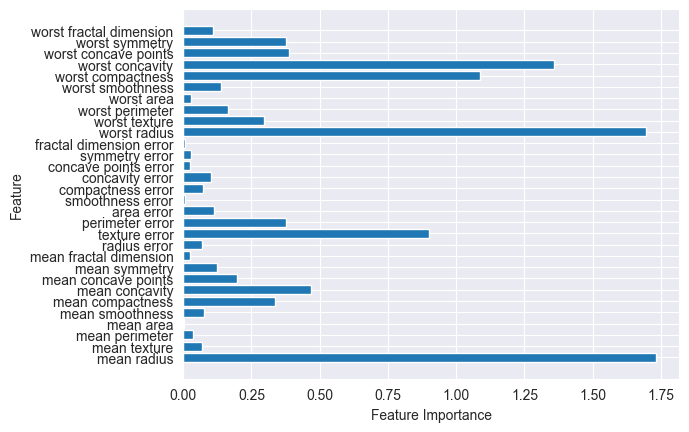

In [93]:
# Построим график значимости признаков (веса регрессионной модели)
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), abs(log_reg.coef_[0]), align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [94]:
LogisticRegression(C= 0.1, penalty='l1')

LogisticRegression(C=0.1, penalty='l1')

**Какая регуляризация используется в модели?**

Наиболее полная справка о построенной модели доступна в библиотеке `statsmodels.api`, однако в ней не поддерживаются некоторые регуляризации и их нужно прописывать формульно. В `statsmodels.api` вы можете получить вывод полной информации для составления уравнения регрессии, огранизованной в виде таблицы.


Однако, чаще используется `sklearn.linear_model.LogisticRegression()`, в котором частично информацию можно получить через `.feature_importances` или `.coef`.

In [95]:
# Добавим константу, чтобы посчитать нулевой коэффициент
X = sm.add_constant(X_train)
# Подгрузим модель
model = sm.OLS(y_train, X)

results = model.fit()

In [96]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.767    
Dependent Variable: y                AIC:                -0.3320  
Date:               2024-10-26 19:59 BIC:                125.3556 
No. Observations:   426              Log-Likelihood:     31.166   
Df Model:           30               F-statistic:        47.73    
Df Residuals:       395              Prob (F-statistic): 3.90e-112
R-squared:          0.784            Scale:              0.054550 
--------------------------------------------------------------------
          Coef.     Std.Err.      t      P>|t|     [0.025     0.975]
--------------------------------------------------------------------
const      3.8053     0.5294    7.1886   0.0000     2.7646    4.8460
x1         0.2524     0.2006    1.2580   0.2091    -0.1420    0.6468
x2        -0.0083     0.0089   -0.9311   0.3524    -0.0257    0.0092
x3        -0.0385     0.0291   -1.3224   0.1868    -0.0957    0.0187
x4         0.0001     0.0006    0.1751   0.8611    -0.0011    0.0013
x5        -2.1171     2.3080   -0.9173   0.3595    -6.6546    2.4203
x6         6.0460     1.6428    3.6802   0.0003     2.8162    9.2758
x7        -1.3757     1.1786   -1.1673   0.2438    -3.6928    0.9413
x8        -0.8200     2.3402   -0.3504   0.7262    -5.4208    3.7808
x9        -0.5005     0.8568   -0.5842   0.5594    -2.1849    1.1838
x10       -7.7307     6.3578   -1.2159   0.2247   -20.2300    4.7686
x11       -0.6535     0.3523   -1.8546   0.0644    -1.3462    0.0392
x12       -0.0237     0.0410   -0.5788   0.5631    -0.1044    0.0569
x13        0.0619     0.0496    1.2490   0.2124    -0.0355    0.1593
x14       -0.0002     0.0018   -0.0876   0.9303    -0.0037    0.0034
x15      -18.7181     7.2611   -2.5779   0.0103   -32.9934   -4.4428
x16       -1.7424     2.4570   -0.7092   0.4786    -6.5728    3.0880
x17        4.0012     1.4780    2.7072   0.0071     1.0955    6.9070
x18      -10.9519     6.7761   -1.6162   0.1068   -24.2737    2.3699
x19        1.6453     3.0954    0.5315   0.5953    -4.4403    7.7309
x20       12.6612    13.0358    0.9713   0.3320   -12.9671   38.2894
x21       -0.1697     0.0652   -2.6045   0.0095    -0.2979   -0.0416
x22       -0.0041     0.0077   -0.5272   0.5983    -0.0193    0.0111
x23        0.0017     0.0066    0.2526   0.8007    -0.0113    0.0147
x24        0.0009     0.0004    2.6258   0.0090     0.0002    0.0017
x25        0.2240     1.5747    0.1422   0.8870    -2.8719    3.3198
x26       -0.2398     0.4404   -0.5444   0.5865    -1.1056    0.6261
x27       -0.4139     0.3034   -1.3643   0.1733    -1.0104    0.1826
x28       -1.1126     1.0658   -1.0439   0.2972    -3.2080    0.9827
x29       -0.7670     0.5649   -1.3578   0.1753    -1.8775    0.3435
x30       -2.8485     2.6368   -1.0803   0.2807    -8.0324    2.3353
------------------------------------------------------------------
Omnibus:              21.609       Durbin-Watson:          2.105  
Prob(Omnibus):        0.000        Jarque-Bera (JB):       23.509 
Skew:                 -0.565       Prob(JB):               0.000  
Kurtosis:             3.222        Condition No.:          1492152
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

In [97]:
results.params

array([ 3.80531507e+00,  2.52390857e-01, -8.27017047e-03, -3.84846472e-02,
        1.07706438e-04, -2.11714344e+00,  6.04602710e+00, -1.37572098e+00,
       -8.19984841e-01, -5.00538522e-01, -7.73066061e+00, -6.53467433e-01,
       -2.37476925e-02,  6.19050809e-02, -1.59167418e-04, -1.87181366e+01,
       -1.74242482e+00,  4.00123010e+00, -1.09518840e+01,  1.64532103e+00,
        1.26611650e+01, -1.69732559e-01, -4.07692784e-03,  1.67145963e-03,
        9.45166626e-04,  2.23975468e-01, -2.39751842e-01, -4.13930800e-01,
       -1.11264171e+00, -7.67002817e-01, -2.84851663e+00])

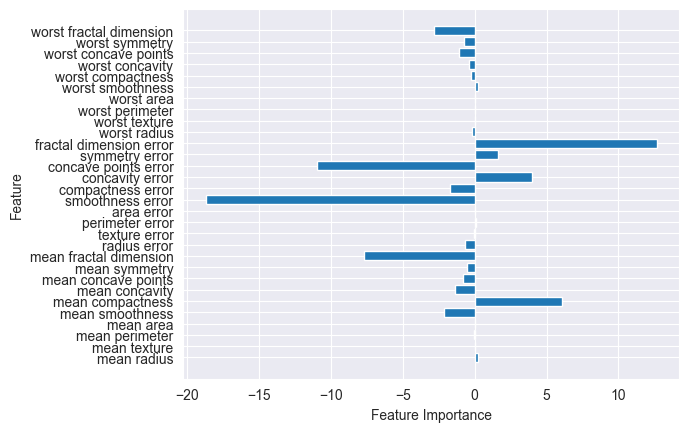

In [98]:
# Построим график значимости признаков
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), results.params[1:], align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Регуляризация

## L1 Lasso regularisation:

Объяснение ближе к математическому: 
    https://stats.stackexchange.com/questions/45643/why-l1-norm-for-sparse-models

In [99]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=10.0)

log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test, y_test)))

print('Coefficients:', log_reg.coef_)

Accuracy on the training set: 0.979
Accuracy on the test set: 0.972
Coefficients: [[ 1.34491120e+00  1.06621022e-01  4.31483139e-03 -9.70036078e-03
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  2.59779398e+00
  -2.75552743e-01 -1.25806911e-01  0.00000000e+00  0.00000000e+00
   4.60480124e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.78906803e-01 -4.80409262e-01  8.14413437e-02 -2.49119055e-02
  -6.12163939e-01  0.00000000e+00 -1.91961915e+00 -3.93045870e+01
  -7.03467793e+00  0.00000000e+00]]


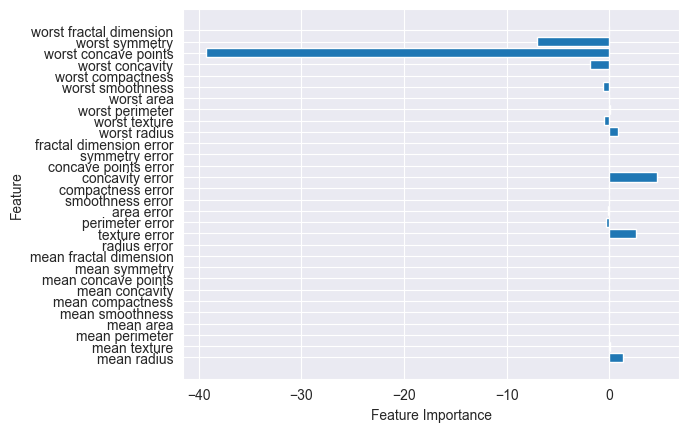

In [100]:
# График значимости признаков
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), log_reg.coef_[0], align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Сколько осталось ненулевых весов в модели?

In [101]:
log_reg.coef_[log_reg.coef_ != 0]

array([ 1.34491120e+00,  1.06621022e-01,  4.31483139e-03, -9.70036078e-03,
        2.59779398e+00, -2.75552743e-01, -1.25806911e-01,  4.60480124e+00,
        8.78906803e-01, -4.80409262e-01,  8.14413437e-02, -2.49119055e-02,
       -6.12163939e-01, -1.91961915e+00, -3.93045870e+01, -7.03467793e+00])

In [102]:
# len(log_reg.coef_[log_reg.coef_!=0])

### Нужно ли провести стандартизацию данных перед обучением и как это влияет на построение модели?

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)

In [104]:
X_train.max(), X_train.min()

(np.float64(3432.0), np.float64(0.0))

In [105]:
X_train_sc.max(), X_train_sc.min()

(np.float64(11.78432971988764), np.float64(-2.7050457451563212))

Accuracy on the training set: 0.955
Accuracy on the training set: 0.951


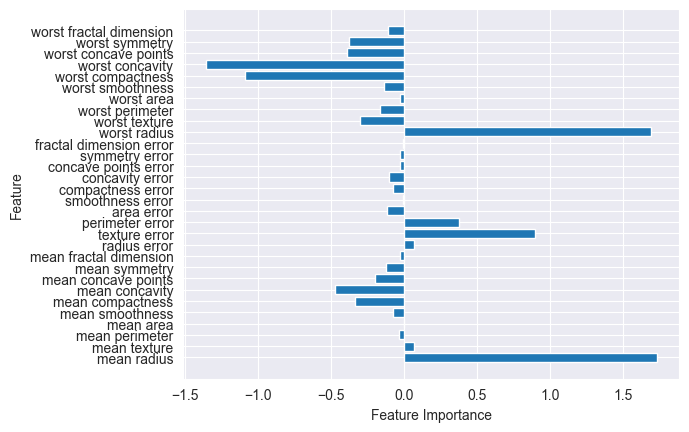

In [106]:
log_reg = LogisticRegression() # без параметров
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#График значимости признаков
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), log_reg.coef_[0], align='center') 
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

Accuracy on the training set: 0.932
Accuracy on the test set: 0.930


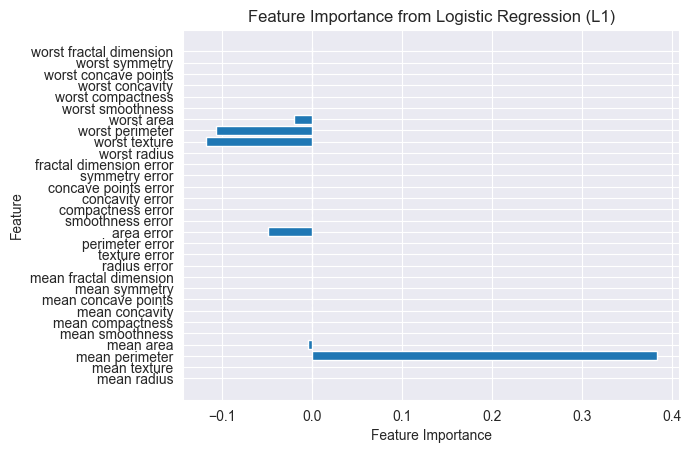

In [107]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear') 

log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test, y_test)))

# График значимости признаков
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), log_reg.coef_[0], align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression (L1)')
plt.show()

#### Сколько осталось ненулевых коэффициентов после применения резуляризации?

In [108]:
len(log_reg.coef_[log_reg.coef_!=0])

6

## Elastic net (L1 & L2 regularisation):

Пример работы совмещенной регуляризации, на практике применим только в специфичных задачах

In [109]:
model

In [110]:
results = model.fit_regularized() # method='elastic_net'

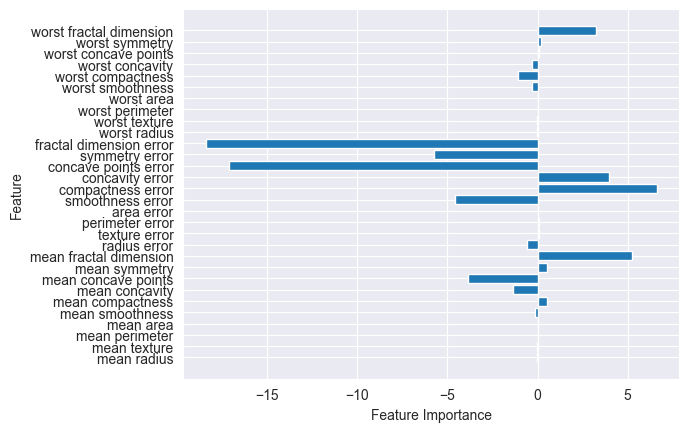

In [111]:
#График значимости признаков
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), results.params[1:], align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [112]:
results.params

array([ 1.05775851e+00, -1.11364622e-02, -8.41758442e-03,  1.74559921e-03,
       -4.29971441e-05, -1.61079193e-01,  5.48552008e-01, -1.35056757e+00,
       -3.87387081e+00,  5.09518885e-01,  5.26762800e+00, -5.59527806e-01,
        6.72555089e-02,  5.24001299e-02,  1.27370868e-03, -4.59583842e+00,
        6.60749077e+00,  3.98818455e+00, -1.71137454e+01, -5.72952167e+00,
       -1.84201483e+01, -1.26242446e-02, -8.90072176e-03,  2.30995792e-03,
       -1.01525290e-04, -3.09343136e-01, -1.08542384e+00, -3.20846070e-01,
        9.71954911e-02,  2.08166100e-01,  3.23479881e+00])

In [113]:
len(results.params)

31

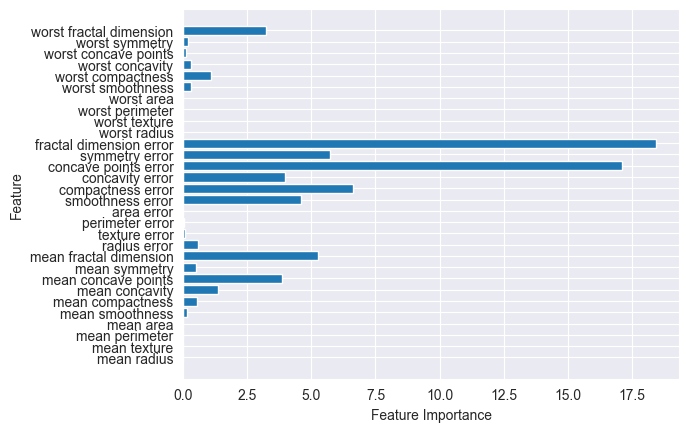

In [114]:
plt.barh(range(n_feature), abs(results.params[1:]), align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

## 2. k Nearest Neighbors



`Sklearn`:
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html'>Regressor</a>
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html'>Classifier</a>

In [115]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Обучение модели 

Набор данных состоит из 50 образцов каждого из трех видов ириса (Iris setosa, Iris virginica и Iris versicolor). Для каждого образца были измерены четыре характеристики: длина и ширина чашелистиков и лепестков в сантиметрах. Вы можете узнать больше об этом наборе данных здесь https://en.wikipedia.org/wiki/Iris_flower_data_set и здесь https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html.

In [116]:
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


#######
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9777777777777777


In [117]:
clf

KNeighborsClassifier()

## 1. Метрики и ядерные функции:

**Метрики, реализованные в `sklearn`**:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html

**Специальные метрики для токенизации в пакете:**

https://pypi.org/project/Distance/

**А также здесь:**

http://www.nltk.org/_modules/nltk/align/bleu_score.html

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

Какая метрика установлена по умолчанию?

In [119]:
knn

KNeighborsClassifier()

Наглядный пример работы классификатора

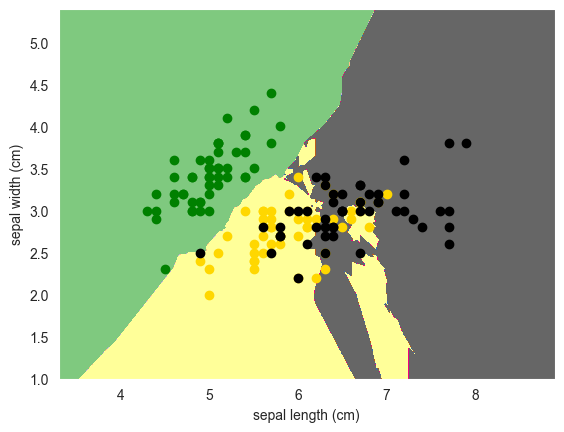

In [120]:
from sklearn.neighbors import KNeighborsClassifier

pair=[0, 1]
X = iris.data[:, [0, 1]]
y = iris.target

n_classes = 3
plot_colors = ['g', 'gold', 'black']
plot_step = 0.005

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))


clf = KNeighborsClassifier(n_neighbors=10).fit(X, y)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap='Accent')

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired)

In [121]:
clf.score(X,y)

0.82

In [122]:
iris.data.shape

(150, 4)

## 2.KNN Regression:

Посмотрим на пример искусственных двумерных данных и прогнозирование этих данных по координате с помощью метода `knn`

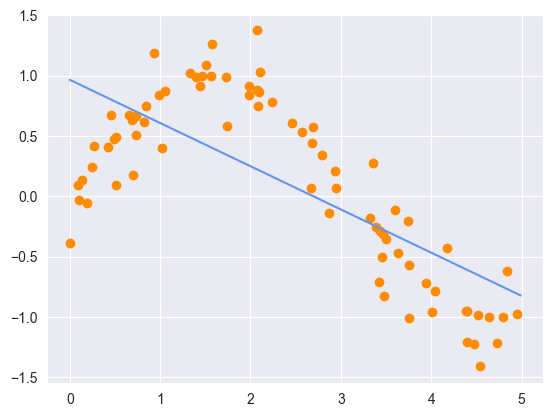

In [139]:
from sklearn.neighbors import KNeighborsRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
# y = np.piecewise(X.flatten(), 
#                  [X.flatten() < 3, X.flatten() >= 3], [-1, 1]).ravel()
y[::2] += 1 * (0.5 - rng.rand(40))

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

# clf = KNeighborsRegressor(n_neighbors=30, 
#                           #weights=gaussian_kernel
#                          ).fit(X, y)
clf = LinearRegression().fit(X, y)

y_ = clf.predict(X_test)
plt.scatter(X, y, c='darkorange', label='data')
plt.plot(X_test, y_, c='cornflowerblue', label='prediction');

## Какое оптимальное число соседей `k`?

In [124]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

In [125]:
X = iris.data
y = iris.target

In [126]:
# Стандартизация
standardizer = StandardScaler()
X_std = standardizer.fit_transform(X)

In [127]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1).fit(X_std, y)

In [128]:
# новый класс объектов - пайплайн (pipeline)
pipe = Pipeline([('standardizer', standardizer), ('knn', knn)])

# построим сетку поиска
search_space = [{'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

In [129]:
# и обозначим объект класса "поиск по сетке"
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(X_std, y)

In [130]:
# выведем параметры лучшей модели `best_estimator`
clf.best_estimator_.get_params()['knn__n_neighbors']

6

In [131]:
range(1,15)

range(1, 15)

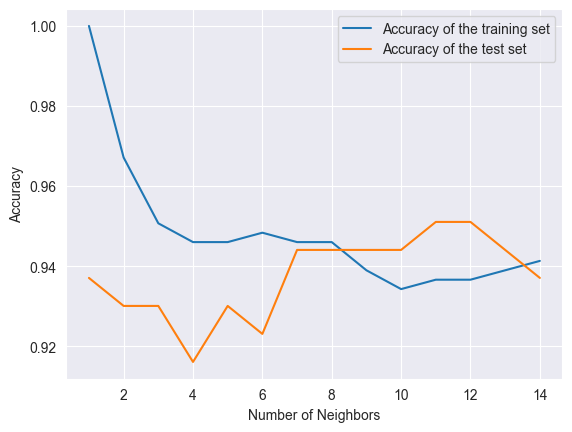

In [132]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)

training_accuracy = []
test_accuracy = []

#Протестируем KNN с различными "k nearest neighbor" от 1 до 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
#     print(n_neighbors)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting, training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting, test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

#глядя на график, наилучший результат достигается, когда параметр n_neighbors равен ...

In [133]:
y_test.shape

(143,)

In [134]:
knn.score(X_test,y_test)

0.9370629370629371

#### Как узнать, какие признаки были более весомыми для классификации?

В `sklearn` нет реализованого метода подсчета важности признака для этого типа классифкаторов.
Существуют методы которые позволяют косвенно оценить значимость признака - убирая его из выборки или заменяя случайными значениями. Или более сложные методы, как https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3281073/ 

### Самостоятельная работа:

1. Заполните пропуски (пример кросс-валидации):

In [141]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Параметры для экспериментов
random_states = [0, 1, 42, 7, 10]  # Разные значения для random_state
n_splits_values = [5, 10]  # Разные значения для n_splits

# Проход по всем комбинациям random_state и n_splits
for n_splits in n_splits_values:
    for random_state in random_states:
        print(f"\nResults for random_state={random_state} and n_splits={n_splits}:")

        # Инициализация кросс-валидации с перемешиванием
        kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
        X = cancer.data
        y = cancer.target
        i = 0
        accuracy_list = []

        for train_index, test_index in kfold.split(X, y):
            # Разделение данных на обучающую и тестовую выборки
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            print('Fold #', i)
            i += 1

            # Обучение модели
            knn = KNeighborsClassifier(n_neighbors=3)  # или любое другое значение для n_neighbors
            knn.fit(X_train, y_train)

            # Оценка точности модели
            accuracy = knn.score(X_test, y_test)
            accuracy_list.append(accuracy)
            print("Accuracy:", accuracy)

        # Вывод средней точности по всем фолдам
        print(f"Average accuracy for random_state={random_state} and n_splits={n_splits}: {np.mean(accuracy_list):.3f}")



Results for random_state=0 and n_splits=5:
Fold # 0
Accuracy: 0.9210526315789473
Fold # 1
Accuracy: 0.9298245614035088
Fold # 2
Accuracy: 0.9298245614035088
Fold # 3
Accuracy: 0.9122807017543859
Fold # 4
Accuracy: 0.9646017699115044
Average accuracy for random_state=0 and n_splits=5: 0.932

Results for random_state=1 and n_splits=5:
Fold # 0
Accuracy: 0.9473684210526315
Fold # 1
Accuracy: 0.8947368421052632
Fold # 2
Accuracy: 0.9298245614035088
Fold # 3
Accuracy: 0.9473684210526315
Fold # 4
Accuracy: 0.9557522123893806
Average accuracy for random_state=1 and n_splits=5: 0.935

Results for random_state=42 and n_splits=5:
Fold # 0
Accuracy: 0.9298245614035088
Fold # 1
Accuracy: 0.8859649122807017
Fold # 2
Accuracy: 0.9385964912280702
Fold # 3
Accuracy: 0.9298245614035088
Fold # 4
Accuracy: 0.9557522123893806
Average accuracy for random_state=42 and n_splits=5: 0.928

Results for random_state=7 and n_splits=5:
Fold # 0
Accuracy: 0.9385964912280702
Fold # 1
Accuracy: 0.9385964912280702
Fo

2. Повторите эксперимент с 5-10 различными `random_state` и `n_splits`.